Note: Every geographical structure below plots the START station

In [4]:
# import all relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

# also import these "new" libraries 
# Note: you may have to download an add them to your environment (using e.g. 'conda install -c conda-forge folium')

import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import timeit

In [5]:
CGO_set = pd.read_csv("chicago_2018.csv", encoding = "ISO-8859-1")
CGO_set.sort_values(["bike_id", "start_time"], inplace=True)

In [6]:
CGO_set.head(50)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
3250542,2018-01-13 13:31:01,2018-01-13 13:40:24,6,35,Dusable Harbor,Streeter Dr & Grand Ave,1,Customer
3252106,2018-01-14 14:53:57,2018-01-14 15:23:57,35,35,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,1,Customer
3259522,2018-01-17 18:05:12,2018-01-17 18:11:54,626,414,Delano Ct & Roosevelt Rd,Canal St & Taylor St,1,Subscriber
3262105,2018-01-18 14:52:25,2018-01-18 14:56:47,414,75,Canal St & Taylor St,Canal St & Jackson Blvd,1,Customer
3265473,2018-01-19 08:45:54,2018-01-19 08:49:28,75,283,Canal St & Jackson Blvd,LaSalle St & Jackson Blvd,1,Subscriber
3267261,2018-01-19 16:23:48,2018-01-19 16:26:40,195,44,Columbus Dr & Randolph St,State St & Randolph St,1,Subscriber
3267975,2018-01-19 17:26:21,2018-01-19 17:30:27,44,51,State St & Randolph St,Clark St & Randolph St,1,Subscriber
3268223,2018-01-19 17:52:36,2018-01-19 18:11:50,51,60,Clark St & Randolph St,Dayton St & North Ave,1,Subscriber
3271044,2018-01-20 14:22:48,2018-01-20 14:38:49,60,181,Dayton St & North Ave,LaSalle St & Illinois St,1,Subscriber
3273335,2018-01-21 09:28:34,2018-01-21 09:47:12,181,35,LaSalle St & Illinois St,Streeter Dr & Grand Ave,1,Customer


In [7]:
# Let's explore fleet size

fleet_size = len(CGO_set["bike_id"].unique())

print("The STR fleet consists of {} bikes (for the observed time frame)".format(fleet_size))

The STR fleet consists of 6133 bikes (for the observed time frame)


In [8]:
CGO_set.isnull()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
3250542,False,False,False,False,False,False,False,False
3252106,False,False,False,False,False,False,False,False
3259522,False,False,False,False,False,False,False,False
3262105,False,False,False,False,False,False,False,False
3265473,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3123120,False,False,False,False,False,False,False,False
3123576,False,False,False,False,False,False,False,False
3123680,False,False,False,False,False,False,False,False
3123748,False,False,False,False,False,False,False,False


In [9]:
CGO_set[CGO_set["bike_id"].isnull()==True]    #no missing bike id's

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type


In [10]:
CGO_set[CGO_set["end_station_id"].isnull()==True]

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type


In [11]:
CGO_stations = pd.read_csv("chicago_stations.csv", encoding = "ISO-8859-1")

In [12]:
CGO_stations.head(10)

,ID,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,373,Kedzie Ave & Chicago Ave,11,11,In Service,41.895465,-87.706128,"(41.89546530305, -87.7061278837)"
1,687,Loomis Blvd & 84th St,15,15,In Service,41.741487,-87.658410,"(41.741486528618054, -87.65841007232666)"
2,102,Stony Island Ave & 67th St,11,11,In Service,41.773458,-87.585340,"(41.77345849948, -87.5853397391)"
3,438,Central Park Ave & Ogden Ave,15,15,In Service,41.854064,-87.715117,"(41.854063503874464, -87.71511733531952)"
4,656,Damen Ave & Walnut (Lake) St,15,15,In Service,41.885951,-87.677009,"(41.885951, -87.677009)"
5,560,Marshfield Ave & 59th St,11,11,In Service,41.786833,-87.666215,"(41.786833, -87.666215)"
6,290,Kedzie Ave & Palmer Ct,15,15,In Service,41.921525,-87.707322,"(41.921525, -87.707322)"
7,649,Stewart Ave & 63rd St,11,11,In Service,41.779835,-87.634774,"(41.779835, -87.634774)"
8,646,State St & 54th St,11,11,In Service,41.796642,-87.625923,"(41.796642, -87.625923)"
9,689,Elizabeth St & 92nd St,15,15,In Service,41.726799,-87.654290,"(41.726798963701185, -87.65429019927979)"


In [13]:
CGO_stations = CGO_stations.rename(columns={'Station Name': 'Station Name'})  #Correcting some bullshit i did before

In [14]:
CGO_stations.rename(columns={'ID':'start_station_id','Total Docks':'start_station_docks', 'Docks in Service':'start_station_dinservice','Status':'start_station_status','Latitude':'start_station_latitude', 'Longitude':'start_station_longitude', 'Location':'start_station_location' }, inplace=True)

In [15]:
CGO_stations.head()

,start_station_id,Station Name,start_station_docks,start_station_dinservice,start_station_status,start_station_latitude,start_station_longitude,start_station_location
0,373,Kedzie Ave & Chicago Ave,11,11,In Service,41.895465,-87.706128,"(41.89546530305, -87.7061278837)"
1,687,Loomis Blvd & 84th St,15,15,In Service,41.741487,-87.658410,"(41.741486528618054, -87.65841007232666)"
2,102,Stony Island Ave & 67th St,11,11,In Service,41.773458,-87.585340,"(41.77345849948, -87.5853397391)"
3,438,Central Park Ave & Ogden Ave,15,15,In Service,41.854064,-87.715117,"(41.854063503874464, -87.71511733531952)"
4,656,Damen Ave & Walnut (Lake) St,15,15,In Service,41.885951,-87.677009,"(41.885951, -87.677009)"


In [16]:
CGO_merged = pd.merge(CGO_set, CGO_stations, 
                   on='start_station_id', 
                   how='left')

In [17]:
CGO_merged["coordinates"] = list(zip(CGO_merged["start_station_latitude"].round(4),CGO_merged["start_station_longitude"].round(4)))

In [18]:
CGO_merged.head() #Now we have a useful dataframe, that includes a lot of information about the start station

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Station Name,start_station_docks,start_station_dinservice,start_station_status,start_station_latitude,start_station_longitude,start_station_location,coordinates
0,2018-01-13 13:31:01,2018-01-13 13:40:24,6,35,Dusable Harbor,Streeter Dr & Grand Ave,1,Customer,Dusable Harbor,39.0,39.0,In Service,41.886976,-87.612813,"(41.886976, -87.612813)","(41.887, -87.6128)"
1,2018-01-14 14:53:57,2018-01-14 15:23:57,35,35,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,1,Customer,Streeter Dr & Grand Ave,47.0,47.0,In Service,41.892278,-87.612043,"(41.892278, -87.612043)","(41.8923, -87.612)"
2,2018-01-17 18:05:12,2018-01-17 18:11:54,626,414,Delano Ct & Roosevelt Rd,Canal St & Taylor St,1,Subscriber,Delano Ct & Roosevelt Rd,19.0,19.0,In Service,41.867491,-87.632190,"(41.867491, -87.63219)","(41.8675, -87.6322)"
3,2018-01-18 14:52:25,2018-01-18 14:56:47,414,75,Canal St & Taylor St,Canal St & Jackson Blvd,1,Customer,Canal St & Taylor St,15.0,15.0,In Service,41.870257,-87.639474,"(41.870257, -87.639474)","(41.8703, -87.6395)"
4,2018-01-19 08:45:54,2018-01-19 08:49:28,75,283,Canal St & Jackson Blvd,LaSalle St & Jackson Blvd,1,Subscriber,Canal St & Jackson Blvd,39.0,39.0,In Service,41.877245,-87.639366,"(41.877245, -87.639366)","(41.8772, -87.6394)"


In [19]:
CGO_merged.dtypes

start_time                   object
end_time                     object
start_station_id              int64
end_station_id                int64
start_station_name           object
end_station_name             object
bike_id                       int64
user_type                    object
Station Name                 object
start_station_docks         float64
start_station_dinservice    float64
start_station_status         object
start_station_latitude      float64
start_station_longitude     float64
start_station_location       object
coordinates                  object
dtype: object

In [20]:
CGO_merged.isna().sum()

start_time                     0
end_time                       0
start_station_id               0
end_station_id                 0
start_station_name             0
end_station_name               0
bike_id                        0
user_type                      0
Station Name                6842
start_station_docks         6842
start_station_dinservice    6842
start_station_status        6842
start_station_latitude      6842
start_station_longitude     6842
start_station_location      6842
coordinates                    0
dtype: int64

In [21]:
CGO_merged = CGO_merged.dropna(subset=['start_station_location'])  #Dropping rows where location data is NaN

In [22]:
CGO_merged  

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Station Name,start_station_docks,start_station_dinservice,start_station_status,start_station_latitude,start_station_longitude,start_station_location,coordinates
0,2018-01-13 13:31:01,2018-01-13 13:40:24,6,35,Dusable Harbor,Streeter Dr & Grand Ave,1,Customer,Dusable Harbor,39.0,39.0,In Service,41.886976,-87.612813,"(41.886976, -87.612813)","(41.887, -87.6128)"
1,2018-01-14 14:53:57,2018-01-14 15:23:57,35,35,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,1,Customer,Streeter Dr & Grand Ave,47.0,47.0,In Service,41.892278,-87.612043,"(41.892278, -87.612043)","(41.8923, -87.612)"
2,2018-01-17 18:05:12,2018-01-17 18:11:54,626,414,Delano Ct & Roosevelt Rd,Canal St & Taylor St,1,Subscriber,Delano Ct & Roosevelt Rd,19.0,19.0,In Service,41.867491,-87.632190,"(41.867491, -87.63219)","(41.8675, -87.6322)"
3,2018-01-18 14:52:25,2018-01-18 14:56:47,414,75,Canal St & Taylor St,Canal St & Jackson Blvd,1,Customer,Canal St & Taylor St,15.0,15.0,In Service,41.870257,-87.639474,"(41.870257, -87.639474)","(41.8703, -87.6395)"
4,2018-01-19 08:45:54,2018-01-19 08:49:28,75,283,Canal St & Jackson Blvd,LaSalle St & Jackson Blvd,1,Subscriber,Canal St & Jackson Blvd,39.0,39.0,In Service,41.877245,-87.639366,"(41.877245, -87.639366)","(41.8772, -87.6394)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603077,2018-12-09 11:56:45,2018-12-09 12:14:26,635,255,Fairbanks St & Superior St (*),Indiana Ave & Roosevelt Rd,6471,Subscriber,Fairbanks St & Superior St,11.0,11.0,In Service,41.895748,-87.620104,"(41.895748, -87.620104)","(41.8957, -87.6201)"
3603078,2018-12-09 13:38:58,2018-12-09 13:59:50,255,301,Indiana Ave & Roosevelt Rd,Clark St & Schiller St,6471,Subscriber,Indiana Ave & Roosevelt Rd,39.0,39.0,In Service,41.867888,-87.623041,"(41.867888, -87.623041)","(41.8679, -87.623)"
3603079,2018-12-09 13:59:59,2018-12-09 14:20:41,301,256,Clark St & Schiller St,Broadway & Sheridan Rd,6471,Subscriber,Clark St & Schiller St,19.0,19.0,In Service,41.907993,-87.631501,"(41.907993, -87.631501)","(41.908, -87.6315)"
3603080,2018-12-09 14:20:51,2018-12-09 14:40:55,256,454,Broadway & Sheridan Rd,Broadway & Granville Ave,6471,Subscriber,Broadway & Sheridan Rd,15.0,15.0,In Service,41.952833,-87.649993,"(41.952833, -87.649993)","(41.9528, -87.65)"


In [23]:
#Select only one bike for performance reason
bike_list = CGO_merged["bike_id"].unique()
selected_bike_id = random.choice(bike_list)
print(selected_bike_id)

3378


In [24]:
#define new map

CGO_heat_map = folium.Map(location=(41.882943480025, -87.632427155018),  tiles='OpenStreetMap',
                       zoom_start=12, control_scale=True, max_zoom=20) #define center coordinate of the map

# add heat map that shows AT WHICH STATIONS ONE BIKE IS RENTED MOST OFTEN
CGO_heat_map.add_child(plugins.HeatMap(CGO_merged[CGO_merged["bike_id"]==selected_bike_id]["coordinates"], radius=20))


CGO_heat_map

In [25]:
# draw positions for selcted cars


CGO_merged_bike_select = CGO_merged[CGO_merged["bike_id"]==selected_bike_id]

positions = list(CGO_merged_bike_select["coordinates"].unique())

for position in positions:
    folium.CircleMarker(radius=5, location=position, popup='The Waterfront', 
                                 color='crimson', fill_color='crimson').add_to(CGO_heat_map)
    
CGO_heat_map

In [26]:
# draw trajectory for a selected bike

folium.PolyLine(CGO_merged_bike_select["coordinates"],color="blue", weight=5, opacity=0.8, ).add_to(CGO_heat_map)
CGO_heat_map

In [67]:
most_frequent_stations = CGO_merged[['bike_id', 'start_station_id']].copy().start_station_id.value_counts().iloc[0:3]

In [68]:
most_frequent_stations

35     66944
192    62654
77     51692
Name: start_station_id, dtype: int64

In [70]:
start_station_id = pd.Series({'1': 35, '2': 192, '3': 77})
bike_id_count = pd.Series({'1': 66944, '2': 62654,'3':51692})
most_frequent_stations_df = pd.DataFrame({'start_station_id':start_station_id, 'bike_id_count':bike_id_count})
most_frequent_stations_df

,start_station_id,bike_id_count
1,35,66944
2,192,62654
3,77,51692


Text(0.5, 1.0, 'most frequent stations')

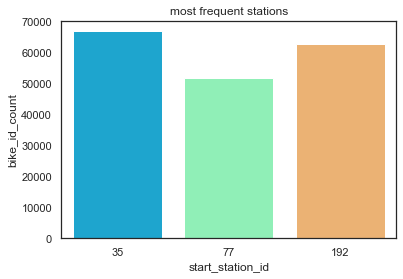

In [78]:
sns.barplot(x="start_station_id", y= "bike_id_count", data=most_frequent_stations_df,palette="rainbow").set_title('most frequent stations')

In [99]:
most_frequent_stations_df_loc = pd.merge(most_frequent_stations_df, CGO_stations, 
                   on='start_station_id', how = 'left') 
most_frequent_stations_df_loc["coordinates"] = list(zip(most_frequent_stations_df_loc["start_station_latitude"].round(4),most_frequent_stations_df_loc["start_station_longitude"].round(4)))
most_frequent_stations_df_loc

,start_station_id,bike_id_count,Station Name,start_station_docks,start_station_dinservice,start_station_status,start_station_latitude,start_station_longitude,start_station_location,coordinates
0,35,66944,Streeter Dr & Grand Ave,47,47,In Service,41.892278,-87.612043,"(41.892278, -87.612043)","(41.8923, -87.612)"
1,192,62654,Canal St & Adams St,47,47,In Service,41.879255,-87.639904,"(41.879255, -87.639904)","(41.8793, -87.6399)"
2,77,51692,Clinton St & Madison St,31,31,In Service,41.882242,-87.641066,"(41.882242, -87.641066)","(41.8822, -87.6411)"


In [101]:
frequent_stations_map = folium.Map(location=(41.882943480025, -87.632427155018),  tiles='OpenStreetMap',
                       zoom_start=12, control_scale=True, max_zoom=20) #define center coordinate of the map


positions = list(most_frequent_stations_df_loc["coordinates"].unique())

for position in positions:
    folium.CircleMarker(radius=5, location=position, popup='The Waterfront', 
                                 color='crimson', fill_color='crimson').add_to(frequent_stations_map)
    
frequent_stations_map
